In [46]:
# Week 12 - Anthony Hugan


# First study the dataset and the associated description of the data (i.e. “data dictionary”). 
# You may need to look around a bit, but it’s there!

# Create a pandas DataFrame with a subset of the columns in the dataset. 
# You should include the column that indicates edible or poisonous, 
# the column that includes odor, and at least one other column of your choosing.

# Add meaningful names for each column.


# Replace the codes used in the data with numeric values—for example, in the first “target” column, “e” 
# might become 0 and “p” might become 1. This is because your downstream processing in Project 4 using 
# scikit-learn requires that values be stored as numerics.

# Perform exploratory data analysis: show the distribution of data for each of the columns you selected, 
# and show scatterplots for edible/poisonous vs. odor as well as the other column that you selected.

# Include some text describing your preliminary conclusions about whether either of the other columns 
# could be helpful in predicting if a specific mushroom is edible or poisonous.


import numpy as np

import pandas as pd

from pandas import DataFrame, Series

import matplotlib.pyplot as plt

import matplotlib
matplotlib.style.use('ggplot')




In [56]:
# first we need to import the data and change the headers

mushrooms = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data',
                        usecols=[0, 3, 5],names = ['Edible or Poisonous', 'Cap Color', 'Odor'], header = None, sep = ',')

mushrooms.head()



,Edible or Poisonous,Cap Color,Odor
0,p,n,p
1,e,y,a
2,e,w,l
3,p,w,p
4,e,g,n


In [57]:
# Replacing the letters to numerical data for analysis. 

# odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
# cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y


mushrooms['Edible or Poisonous'].replace({'e':0, 'p': 1}, inplace=True)
mushrooms['Cap Color'].replace({'n':0, 'b':1, 'c':2, 'g':3, 'r':4, 'p':5, 'u':6, 'e':7, 'w':8, 'y':9}, inplace=True)
mushrooms['Odor'].replace({'a':0, 'l':1, 'c':2, 'y':3, 'f':4, 'm':5, 'n':6, 'p':7, 's':8}, inplace=True)

mushrooms.head()





,Edible or Poisonous,Cap Color,Odor
0,1,0,7
1,0,9,0
2,0,8,1
3,1,8,7
4,0,3,6


In [67]:
# Checking to make sure they are all integers

print (mushrooms.dtypes)

Edible or Poisonous    int64
Cap Color              int64
Odor                   int64
dtype: object


<AxesSubplot:xlabel='Edible or Poisonous', ylabel='Odor'>

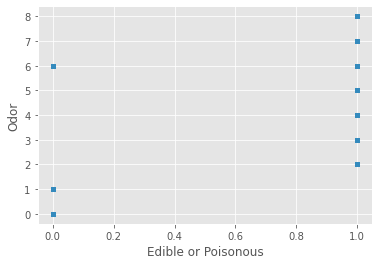

In [66]:
mushrooms.plot(x ='Edible or Poisonous', y='Odor', kind = 'scatter')



Judging by this scatterplot it would appear that odor can be utilized to determine if a mushroom is either edible or poisonous.  

<AxesSubplot:xlabel='Edible or Poisonous', ylabel='Cap Color'>

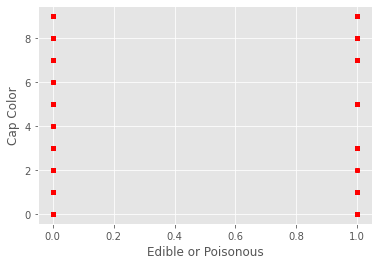

In [63]:
mushrooms.plot(x ='Edible or Poisonous', y='Cap Color', kind = 'scatter', color='r')

Cap color on the other hand does not seem to be a good indicator as to whether or not a mushroom is edible or poisonous. We can see that the distribution of colors is fairly equal between the two. 